# Data processing

# Libraries

In [18]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from constants import RANDOM_FOREST_PARAMS

from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

from tqdm import tqdm

# Data Loading

In [23]:
X_list = []
y_list = []

for i in range(10):
    X = pd.read_parquet(f"../../../../data/interim/copper/X_train_bal/X_{i}.parquet")
    y = pd.read_parquet(f"../../../../data/interim/copper/y_train_bal/y_{i}.parquet")

    X_list.append(X)
    y_list.append(y)

# Seleção de features com Boruta

In [24]:
def importance_extimation(X, y, i):
    model = RandomForestClassifier(RANDOM_FOREST_PARAMS)

    feat_selector = BorutaPy(model, n_estimators='auto', random_state=i)

    feat_selector.fit(X.values, y.values)

    ranks = pd.DataFrame(feat_selector.ranking_, index = X.columns, columns=[0]).sort_values(by = 0, ascending=True).T

    return ranks

def importance_experiment(X_list, y_list, i):
    
    rankings_list = [importance_extimation(X, y, i) for X, y in zip(X_list, y_list)]

    return rankings_list

In [25]:
experiments = [importance_experiment(X_list, y_list, i) for i in tqdm(range(100))]

  1%|          | 1/100 [02:00<3:18:14, 120.15s/it]


KeyboardInterrupt: 

Text(0, 0.5, 'Features')

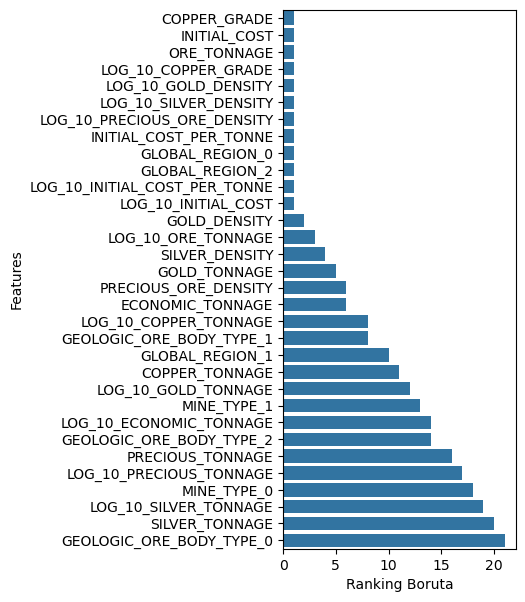

In [11]:
feature_importance = pd.DataFrame(feat_selector.ranking_, index = X.columns).sort_values(ascending=True).T

plt.figure(figsize=(3, 7))
sns.barplot(x=feature_importance, y=feature_importance.index, orient='h')
plt.xlabel("Ranking Boruta")
plt.ylabel("Features")